## Parte 1: Clusterização
Considere o conjunto de dados sobre clientes de um shopping disponibilizado em: 

https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv 

Esse conjunto de dados é composto pelas variáveis CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100). Suponha que o seu trabalho como analista de dados seja encontrar perfis de consumidores. 
    Considerando as variáveis numéricas, faça a clusterização dos dados, encontrando a quantidade ótima de clusters. 
    Mostre os valores dos atributos dos centróides de cada cluster. 
    Que observações podem ser feitas sobre cada cluster? Ou seja, que tipo de cliente cada cluster representa. Discuta.

Extra: crie scatterplots com os dados clusterizados. Considere fazer gráficos dois-a-dois (use a cor para representar gênero):

Annual Income (k$) x Spending Score (1-100)

Annual Income (k$) x Age

Age x Spending Score (1-100)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
from sklearn.cluster import KMeans
X = df.drop(['Gender', 'CustomerID'], axis=1)

#### Aplicação do método do cotovelo para encontrar o melhor número de clusters

C:\Users\Julio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


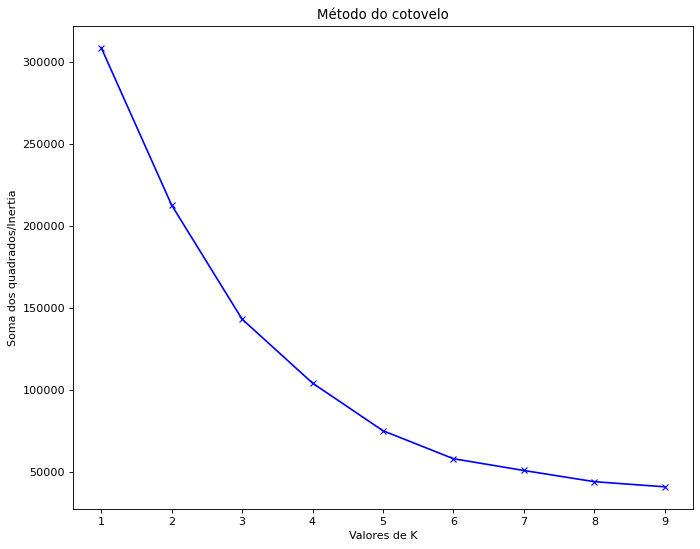

In [37]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
soma_dos_quadrados = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    soma_dos_quadrados.append(kmeans.inertia_)
plt.plot(K,soma_dos_quadrados,'bx-')
plt.xlabel('Valores de K') 
plt.ylabel('Soma dos quadrados/Inertia') 
plt.title('Método do cotovelo')
plt.show()

##### Após analise do gráfico, o número de Clusters escolhido foi 5.

In [6]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [28]:
print(kmeans.labels_)
labels = kmeans.labels_

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [8]:
df['Cluster'] = labels
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


### Análise do Cluster 0

In [9]:
zero = df['Cluster'] == 0
df[zero]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
46,47,Female,50,40,55,0
47,48,Female,27,40,47,0
48,49,Female,29,40,42,0
49,50,Female,31,40,42,0
50,51,Female,49,42,52,0
...,...,...,...,...,...,...
120,121,Male,27,67,56,0
121,122,Female,38,67,40,0
122,123,Female,40,69,58,0
126,127,Male,43,71,35,0


In [31]:
kmeans.cluster_centers_[0]

array([43.08860759, 55.29113924, 49.56962025])

##### No Cluster 0 foram alocadas pessoas de renda anual média, indo de 40 até 76, e  que tem um gasto mediano no shopping.

## Análise do Cluster 1

In [10]:
um = df['Cluster'] == 1
df[um]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
124,125,Female,23,70,29,1
128,129,Male,59,71,11,1
130,131,Male,47,71,9,1
132,133,Female,25,72,34,1
134,135,Male,20,73,5,1
136,137,Female,44,73,7,1
138,139,Male,19,74,10,1
140,141,Female,57,75,5,1
144,145,Male,25,77,12,1
146,147,Male,48,77,36,1


In [32]:
kmeans.cluster_centers_[1]

array([40.66666667, 87.75      , 17.58333333])

##### No Cluster 1 foram alocadas pessoas com uma renda anual alta, de 70 para cima, e que possuem um gasto muito baixo no shopping.

## Análise do Cluster 2

In [11]:
dois = df['Cluster'] == 2
df[dois]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
2,3,Female,20,16,6,2
4,5,Female,31,17,40,2
6,7,Female,35,18,6,2
8,9,Male,64,19,3,2
10,11,Male,67,19,14,2
12,13,Female,58,20,15,2
14,15,Male,37,20,13,2
16,17,Female,35,21,35,2
18,19,Male,52,23,29,2


In [33]:
kmeans.cluster_centers_[2]

array([45.2173913 , 26.30434783, 20.91304348])

##### No Cluster 2 foram alocadas pessoas de renda anual baixa, e que também tem um gasto baixo no shopping.

## Análise do Cluster 3

In [12]:
tres = df['Cluster'] == 3
df[tres]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
11,12,Female,35,19,99,3
13,14,Female,24,20,77,3
15,16,Male,22,20,79,3
17,18,Male,20,21,66,3
19,20,Female,35,23,98,3


In [34]:
kmeans.cluster_centers_[3]

array([25.52173913, 26.30434783, 78.56521739])

##### No Cluster 3 pode-se observar uma peculiaridade, ele é formado por pessoas jovens, a idade média das pessoas desse Cluster é 25 anos e elas possuem baixa renda anual, porém, apresentam um alto gasto no shopping.

## Análise do Cluster 4

In [13]:
quatro = df['Cluster'] == 4
df[quatro]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,4
125,126,Female,31,70,77,4
127,128,Male,40,71,95,4
129,130,Male,38,71,75,4
131,132,Male,39,71,75,4
133,134,Female,31,72,71,4
135,136,Female,29,73,88,4
137,138,Male,32,73,73,4
139,140,Female,35,74,72,4
141,142,Male,32,75,93,4


In [35]:
kmeans.cluster_centers_[4]

array([32.69230769, 86.53846154, 82.12820513])

##### No Cluster 4 foram alocadas as pessoas de alta renda anual, e que tem um alto gasto no shopping.

## Centroides de todos os Clusters:

In [30]:
kmeans.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333],
       [45.2173913 , 26.30434783, 20.91304348],
       [25.52173913, 26.30434783, 78.56521739],
       [32.69230769, 86.53846154, 82.12820513]])

## Parte 2: Redução de dimensionalidade
Considere o conjunto de dados MNIST utilizado na Atividade 6. Realize a redução de dimensionalidade dos dados com o algoritmo PCA. Escolha um algoritmo de classificação e aplique ele, comparando os resultados com e sem a redução de dimensionalidade. A quantidade de dimensões utilizadas é de sua escolha. Discuta o resultado.

Extra: faça o plot de imagens do dataset após a redução de dimensionalidade.


In [23]:
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_size = X_train.shape[1] 
input_size = image_size * image_size
print(f'Shape X_train: {X_train.shape}')

Shape X_train: (60000, 28, 28)


In [25]:
X_train = np.reshape(X_train, [-1, input_size])
X_test = np.reshape(X_test, [-1, input_size])

In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
print(f'Shape X_train: {X_train.shape}')

Shape X_train: (60000, 784)


### Modelo de classificação(sem PCA)

In [28]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
N = KNeighborsClassifier()
N.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_predict = N.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
A = accuracy_score(y_test, y_predict)
print(f'A acurácia foi de: {round(A*100, 2)}%')

A acurácia foi de: 96.88%


### Aplicando PCA para redução da dimensionalidade

In [31]:
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

(60000, 154)

In [43]:
pca.explained_variance_ratio_

array([0.09704292, 0.07095652, 0.06168852, 0.05389213, 0.0486861 ,
       0.04312066, 0.03271805, 0.02883785, 0.02761924, 0.0235691 ,
       0.02109109, 0.02022914, 0.01715753, 0.01692047, 0.01578581,
       0.01482896, 0.0132451 , 0.01276849, 0.01187218, 0.0115264 ,
       0.01066125, 0.01006675, 0.00953537, 0.00912509, 0.00883371,
       0.00839287, 0.00812548, 0.00786336, 0.00744705, 0.00690833,
       0.00658069, 0.00648123, 0.00602592, 0.0058656 , 0.0057    ,
       0.00543607, 0.00505767, 0.0048784 , 0.00481411, 0.00472248,
       0.0045673 , 0.00444819, 0.00418485, 0.003982  , 0.0038496 ,
       0.00375089, 0.00361995, 0.00351578, 0.00340045, 0.00321862,
       0.00319005, 0.00312793, 0.00295971, 0.00288944, 0.0028412 ,
       0.00271426, 0.00269511, 0.00258463, 0.00253761, 0.00244772,
       0.00240497, 0.00239254, 0.002304  , 0.00221524, 0.00213713,
       0.00207217, 0.00203035, 0.00196775, 0.00192845, 0.00188625,
       0.0018697 , 0.00181076, 0.00177555, 0.00174892, 0.00165

In [33]:
N = KNeighborsClassifier()
N.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_predict = N.predict(X_test)

In [35]:
A = accuracy_score(y_test, y_predict)
print(f'A acurácia foi de: {round(A*100, 2)}%')

A acurácia foi de: 97.12%


## Conclusões

    Após o uso do PCA para a redução da dimensionalidade a acurácia foi de 97.12%, apresentando uma melhora em relação ao modelo sem PCA.
    Atribuo essa melhora ao fator da maldição da dimensionalidade, que implica que apartir de um determinado número de variáveis, o desempenho do classificador começa a piorar. Ao fazer o uso do PCA para diminuir a quantidade de variáveis, esse problema é resolvido, pois, com apenas 154 variáveis, foi possível explicar 95% desse dataset, então pode-se dizer que as outras 630 variáveis não eram importantes na classificação.